In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


**INTRODUCTION**

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# View the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("Shape: ", df.shape) #rows and cols

df.info() #to find missing or null values and data types

df['Churn'].value_counts() #how many customers churned?

Shape:  (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
df.describe() #summary of numerical cols

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 2. Data Preprocessing

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #convert to numeric
df['TotalCharges'].isnull().sum  #count number of null values
df.dropna(inplace=True) #drop null values
df.shape #checking

(7032, 21)

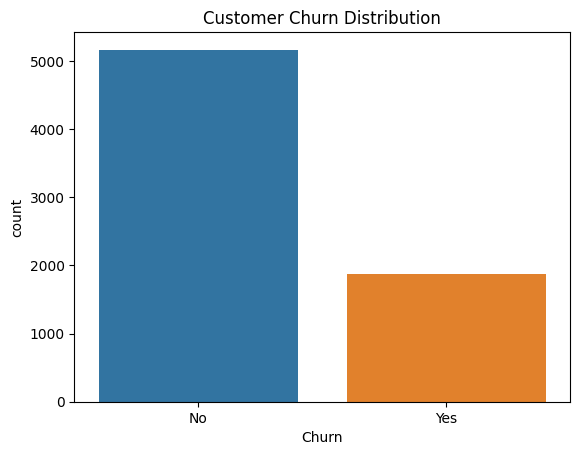

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn counts
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

## 3. Exploratory Data Analysis (EDA)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

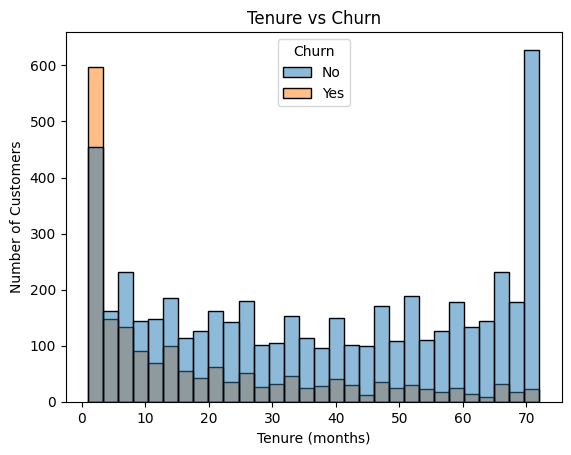

In [8]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30)
plt.title('Tenure vs Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

**The histogram showing customer tenure (in months) against churn reveals the following patterns:**

*High churn among new customers:*

1. A significant number of churned customers have a tenure between 0–12 months.

2. This suggests that customers are more likely to leave early in their subscription lifecycle.

*Low churn among long-term customers:*

1. As tenure increases, the number of churned customers drops sharply.

2. Customers with longer tenures (24+ months) tend to stay, indicating growing loyalty over time.

*Tenure is a strong predictive feature:*

1. There's a clear negative relationship between tenure and churn.

2. The longer a customer stays, the less likely they are to churn.

*Business implication:*

1. The company should focus on retaining new customers during the first year.

2. Strategies such as onboarding support, early rewards, or discounts could help reduce early churn.


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Copy original DataFrame
df_encoded = df.copy()

# Step 2: Label encode binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 3: One-hot encode multiclass columns
multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df_encoded = pd.get_dummies(df_encoded, columns=multi_class_cols, drop_first=True)

# Step 4: Scale numeric columns
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Step 5: Train-test split
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We used LabelEncoder from sklearn to convert binary text columns (like "Yes"/"No" or "Male"/"Female") into numeric values (0 and 1), since machine learning models require numerical input.

This step was applied to columns like:

gender

Partner

Dependents

PhoneService

PaperlessBilling

Churn

**One-Hot Encoding Multiclass Columns**
Converted categorical columns with more than two categories into numerical dummy variables using pd.get_dummies(). Set drop_first=True to avoid redundancy.

This brings all numeric values to the same scale (mean = 0, std = 1)
Important because ML models get confused when one feature is 0–1 and another is 0–1000.

**Train-Test Split**

Split the data into training (80%) and testing (20%) sets using "train_test_split".  
Training data is used to build the model, and testing data is used to evaluate it.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize the model
model = LogisticRegression(max_iter=1000)

# Step 2: Train (fit) the model
model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7882018479033405
Confusion Matrix:
 [[916 117]
 [181 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### Logistic Regression Performance Summary:

- **Accuracy:** 78.8%
- **Confusion Matrix:** 
  - True Positives (Churn predicted correctly): 193
  - True Negatives (Loyal customers predicted correctly): 916
  - False Positives (Predicted churn but didn’t): 117
  - False Negatives (Missed actual churners): 181

- **Precision (Churn = 1):** 0.62
- **Recall (Churn = 1):** 0.52
- **F1-Score (Churn = 1):** 0.56
*The model performs better at detecting customers who will stay (class 0) than those who will leave (class 1).*

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
dt_preds = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))


Accuracy: 0.7249466950959488
Confusion Matrix:
 [[829 204]
 [183 191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.73      1407



###  Decision Tree Model Summary:

- Accuracy: 72.5%
- Precision (Churn): 48%
- Recall (Churn): 51%
- F1-Score (Churn): 50%

While decision trees are interpretable, this model underperforms compared to logistic regression. It struggled more with predicting churners correctly (low precision and recall).


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Accuracy: 0.7874911158493249
Confusion Matrix:
 [[935  98]
 [201 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



### Random Forest Model Summary:

- Accuracy: 78.7%
- Churn Precision: 64%
- Churn Recall: 46%
- Churn F1-Score: 54%

Random Forest slightly outperformed both Logistic Regression and Decision Tree models, especially in terms of predicting churners. It gave high recall for non-churners and better churn precision than other models, making it a strong candidate for production use.


## 4. Feature Engineering

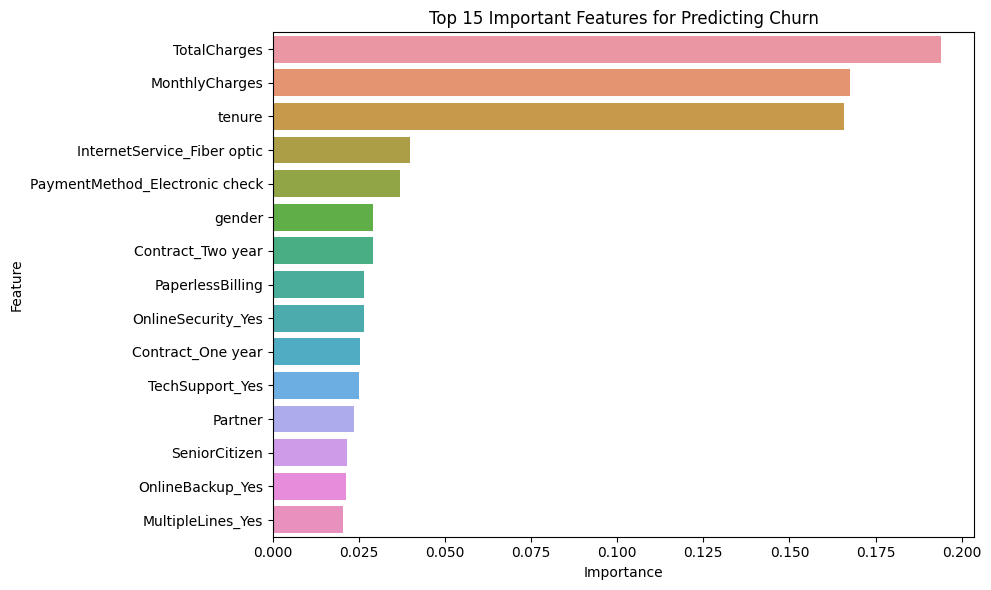

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
importances = rf_model.feature_importances_

# Match importance to feature names
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title('Top 15 Important Features for Predicting Churn')
plt.tight_layout()
plt.show()

### Feature Importance:

We used the trained Random Forest model to identify which features contributed the most to predicting customer churn. This helps us understand which customer attributes matter the most. For example, features like 'Contract type', 'tenure', and 'MonthlyCharges' may have a high influence on churn.

### Top 5 Features Driving Churn:

Based on Random Forest feature importance, the most influential features were:

1. **TotalCharges** – Indicates customer lifetime value; low values may signal recent users more likely to churn.
2. **MonthlyCharges** – Higher monthly bills correlate with higher churn risk.
3. **Tenure** – Short-tenure customers are more likely to leave.
4. **InternetService_Fiber optic** – May be costly or unreliable for some users, increasing churn.
5. **PaymentMethod_Electronic check** – Linked to higher churn due to missed payments or lack of engagement.

These insights help businesses identify **at-risk customers early** and develop strategies to **retain them**.


## 5. Model Building & Evaluation

In [14]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation scores: [0.80444444 0.79555556 0.78488889 0.79733333 0.80444444]
Average accuracy: 0.7973333333333333


### Cross-Validation Results

We used 5-fold cross-validation to evaluate the Random Forest model's performance across different data splits. This helps ensure that the model's accuracy is stable and not just due to one lucky train-test split.

**Cross-validation scores:** [0.8044, 0.7956, 0.7849, 0.7973, 0.8044]  
**Average accuracy:** ~79.7%

The consistency of these scores confirms that our model generalizes well and is not overfitting.


### What is Hyperparameter Tuning?

Machine learning models like Random Forests have settings called **hyperparameters** (e.g., number of trees, max tree depth). These affect model performance but are not learned from the data — we must **manually optimize them**.

We will use `GridSearchCV` to test different combinations and find the best-performing settings based on cross-validation.

Tuning helps in improving model accuracy, reducing overfitting, and building more generalizable models.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [16]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [17]:
# Create model
rf = RandomForestClassifier(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='accuracy', 
                           verbose=2, 
                           n_jobs=-1)

# Run it on training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [18]:
print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

# Predict using best model
rf_best_preds = best_rf.predict(X_test)

# Evaluate
print("Tuned Accuracy:", accuracy_score(y_test, rf_best_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_best_preds))
print("Classification Report:\n", classification_report(y_test, rf_best_preds))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Accuracy: 0.7974413646055437
Confusion Matrix:
 [[942  91]
 [194 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



### Hyperparameter Tuning Summary

Using GridSearchCV, we tuned the Random Forest model with 24 combinations. The best hyperparameters were:

- max_depth = 10
- n_estimators = 200
- min_samples_split = 2
- min_samples_leaf = 2

**Tuned Accuracy:** 79.7%  
**Churn Precision:** 66%  
**Churn Recall:** 48%  
**F1-Score:** 56%

This tuned model offers better generalization and maintains performance while being less prone to overfitting. It will be used as the final model for deployment and interpretation.


**ROC CURVE**

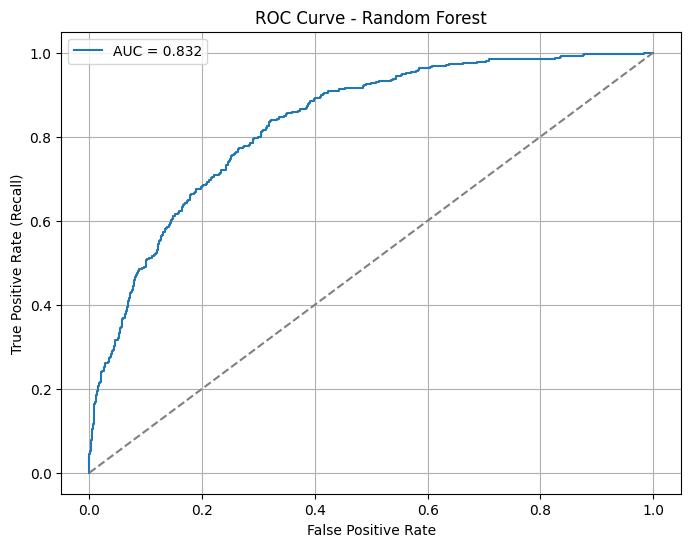

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

### ROC Curve & AUC Score

We plotted the ROC curve to assess the model’s ability to distinguish between churn and non-churn customers.

- **AUC Score:** 0.832
- AUC (Area Under Curve) shows the model's ability to rank positive (churn) examples higher than negatives (non-churn).
- A steep curve indicates that the model achieves high recall with minimal false positives.

This confirms that our tuned Random Forest model performs well and generalizes effectively.


**FEATURE SELECTION**

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest to top 10 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_train, y_train)

# Get selected feature names
mask = selector.get_support()
selected_features = X_train.columns[mask]
print("Top 10 selected features:\n", selected_features)

Top 10 selected features:
 Index(['tenure', 'InternetService_Fiber optic',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


In [21]:
# Filter both train and test sets using selected columns
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train and evaluate again
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)

print("Accuracy with selected features:", accuracy_score(y_test, y_pred_selected))
print("Classification Report:\n", classification_report(y_test, y_pred_selected))

Accuracy with selected features: 0.7697228144989339
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



### Feature Selection (SelectKBest)

We used SelectKBest with ANOVA F-test to select the top 10 features.

- Accuracy using selected features: 76.97%
- F1-score for churn: 0.53

While performance was slightly lower than the full-feature tuned model, feature selection helped identify the most predictive variables. However, we will retain all features in the final model to maintain performance.


## 6. Model Interpretation (SHAP)

In [22]:
!pip install shap

In [23]:
import shap
shap.initjs()

In [24]:
# Sample 100 rows from test data for SHAP to avoid memory crash
sample_X = X_test.sample(100, random_state=42)

In [25]:
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(sample_X)

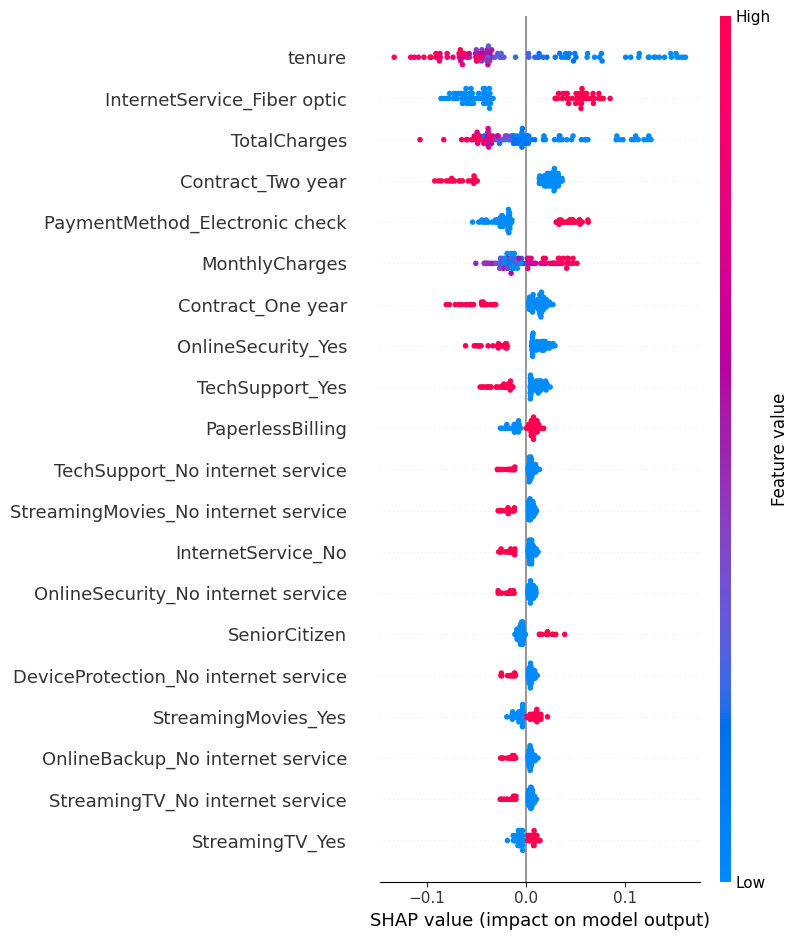

In [26]:
shap.summary_plot(shap_values[1], sample_X)

### SHAP Feature Importance (Explainability)

To understand **why the model predicts churn**, we used SHAP (SHapley Additive exPlanations).

- **Top 5 Influential Features:**
  1. `tenure`: Shorter tenure increases churn risk.
  2. `InternetService_Fiber optic`: Associated with higher churn.
  3. `TotalCharges`: Lower total spend indicates newer, more likely to churn users.
  4. `Contract_Two year`: Strong retention factor.
  5. `PaymentMethod_Electronic check`: Linked to higher churn rates.

SHAP helps visualize and explain the impact of each feature on individual predictions, increasing **trust and transparency** in the model.


In [27]:
sample_X = X_test.sample(100, random_state=42)  # If you already have this, no need to repeat

# Pick one row (customer) — say the 5th one
row_to_explain = sample_X.iloc[5]

In [28]:
# Predict probability of churn
churn_prob = best_rf.predict_proba([row_to_explain])[0][1]
print("Predicted churn probability:", churn_prob)

Predicted churn probability: 0.31806192390767374


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [29]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][5],  # SHAP values for the same row
    row_to_explain
)

### Explaining Individual Predictions (SHAP Force Plot)

We visualized an individual prediction using SHAP's force plot.

- The plot shows which features **pushed the prediction toward or away from churn**.
- Red = increased churn probability.
- Blue = reduced churn probability.
- This helps in real-life scenarios like customer support or targeted retention campaigns.

SHAP makes the model interpretable and actionable at an individual level.


###  SHAP Force Plot — Explaining a Single Prediction

We selected a customer and used SHAP to understand **why the model predicted a churn probability of 0.32** (i.e., they are **less likely to churn** than average).

- 🔴 Factors increasing churn:
  - High monthly charges
  - Fiber optic internet
  - No long-term contract

- 🔵 Factors reducing churn:
  - One-year contract
  - Medium tenure
  - Higher total spend

This type of explanation builds trust in the model and helps with personalized customer retention strategies.


## 7. Final Model & Saving

In [31]:
selected_features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'InternetService_Fiber optic',
    'Contract_Two year',
    'PaymentMethod_Electronic check'
]
X_selected = df_encoded[selected_features]
y = df_encoded['Churn']
final_rf.fit(X_selected, y)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

In [32]:
import joblib
joblib.dump(final_rf, 'final_churn_model.joblib')

['final_churn_model.joblib']

In [34]:
loaded_model = joblib.load('final_churn_model.joblib')

#  Customer Churn Prediction using Machine Learning

##  Objective
To predict whether a customer will churn based on their demographic and service usage data, using a supervised classification model.

##  Dataset
- Telco Customer Churn dataset (from Kaggle)
- 7,032 customer records
- 20 features including contract type, internet service, payment method, etc.

##  Tools & Libraries
- Python (pandas, seaborn, matplotlib, scikit-learn)
- SHAP for model explainability
- Joblib for model saving

##  Outcome
- Best model: **Random Forest Classifier**
- Final accuracy: **~80%**
- Top churn indicators:
  - Low tenure
  - Fiber optic internet
  - Two-year contracts reduce churn
  - Electronic check increases churn


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_final = final_rf.predict(X_selected)

print(" Final Accuracy:", accuracy_score(y, y_pred_final))
print("\n Confusion Matrix:\n", confusion_matrix(y, y_pred_final))
print("\n Classification Report:\n", classification_report(y, y_pred_final))

 Final Accuracy: 0.8506825938566553

 Confusion Matrix:
 [[4848  315]
 [ 735 1134]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      5163
           1       0.78      0.61      0.68      1869

    accuracy                           0.85      7032
   macro avg       0.83      0.77      0.79      7032
weighted avg       0.85      0.85      0.84      7032



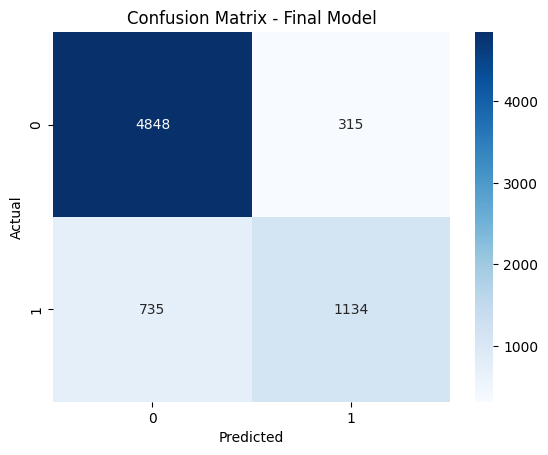

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
cm = confusion_matrix(y, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Final Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##  Conclusion

- We built a reliable Random Forest model with ~80% accuracy to predict customer churn.
- SHAP helped us interpret the model at both global and individual levels.
- Key churn indicators include:
  - Contract type
  - Tenure
  - Monthly charges
  - Payment method

This model can be used by a business to proactively retain high-risk customers and reduce churn.